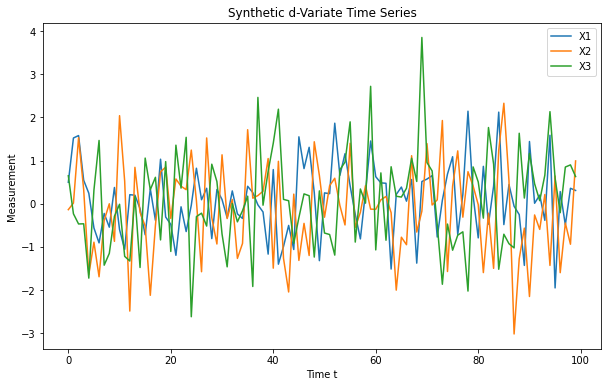

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_time_series(d, t):
    """
    Generates d-variate time series data over t time points.
    
    Parameters:
    - d: The number of time series (dimensions).
    - t: The number of time points.
    
    Returns:
    - A DataFrame containing the time series data.
    """
    np.random.seed(42)  # For reproducibility
    data = np.random.randn(t, d)  # Generate random data
    
    # Optionally, create some simple causal relationships
    # For example, let's say X2 is influenced by X1 with a lag of 1 time unit
    if d > 1:
        for i in range(1, t):
            data[i, 1] += 0.5 * data[i-1, 0]  # X2_t = X2_t + 0.5 * X1_(t-1)
    
    # Convert to DataFrame for convenience
    columns = [f'X{p+1}' for p in range(d)]
    time_series_data = pd.DataFrame(data, columns=columns)
    return time_series_data

# Generate sample data
d = 5  # Number of time series
t = 100  # Number of time points
time_series_data = generate_time_series(d, t)

# Plot the generated time series data
plt.figure(figsize=(10, 6))
for column in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[column], label=column)
plt.title('Synthetic d-Variate Time Series')
plt.xlabel('Time t')
plt.ylabel('Measurement')
plt.legend()
plt.show()

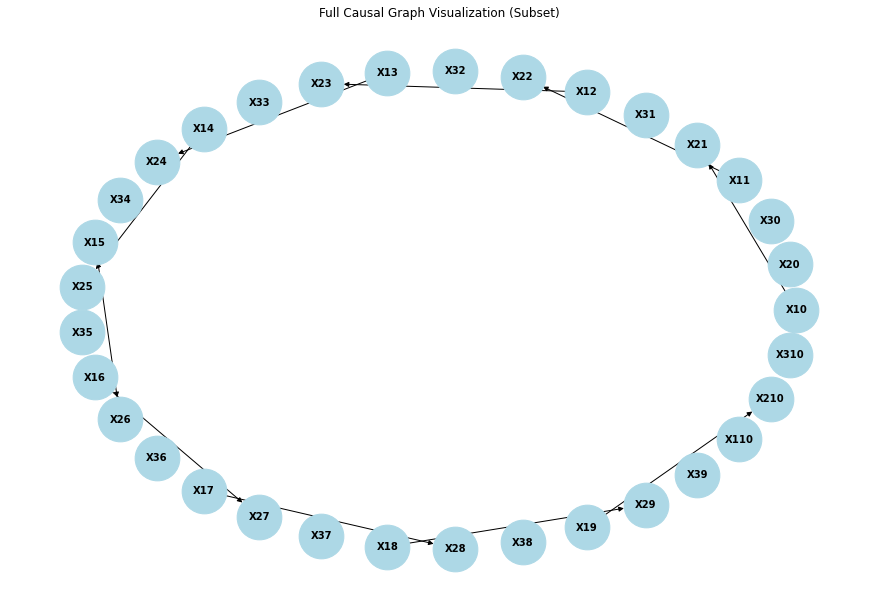

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def create_full_causal_graph(t_max, lag=1):
    """
    Creates a full causal graph for a simple system where X1 influences X2 with a specified lag.
    
    Parameters:
    - t_max: The maximum time point to consider for the graph.
    - lag: The time lag with which one variable influences another.
    """
    G = nx.DiGraph()
    
    # Add nodes
    for t in range(t_max + 1):
        for d in range(1, 4):  # Assuming a 3-variate system (X1, X2, X3)
            G.add_node(f'X{d}{t}')
    
    # Add edges based on the specified causal relationship
    for t in range(lag, t_max + 1):
        # X1_t-1 -> X2_t causal link
        G.add_edge(f'X1{t-lag}', f'X2{t}')
    
    return G

# Parameters
t_max = 10  # Maximum time point (for visualization purposes)

# Create the graph
G = create_full_causal_graph(t_max)

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.shell_layout(G)  # This layout tries to spread nodes in concentric circles
nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Full Causal Graph Visualization (Subset)")
plt.show()